In [36]:
%load_ext autoreload

import os
import sys

print(os.getcwd())
os.chdir(os.path.expanduser('~') + '/Code/vail')
print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/msc/Code/vail
/Users/msc/Code/vail


In [37]:
%autoreload 2
import ml

In [38]:
o = ml.Options({'environment': 'walker2d-medium-replay-v2'})
d = ml.OfflineDataset(o)
d._build()

In [39]:
import matplotlib.pyplot as plt
import gym
import numpy as np
import torch
import d4rl
import random

from torchvision.transforms import Resize
from torchvision.transforms.functional import crop


tensor([[311.0628],
        [309.8250],
        [308.5743],
        [307.4686],
        [306.5278],
        [305.6110],
        [304.6436],
        [303.4924],
        [302.2144],
        [300.7529]])


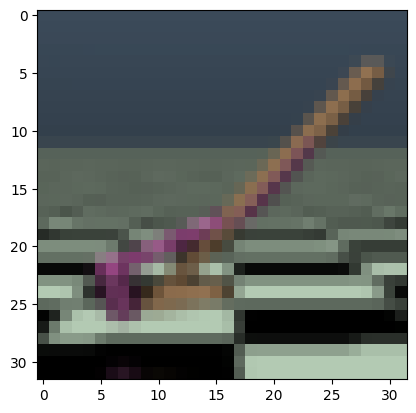

In [104]:
rand = random.randint(0, len(d.data['frames']))

plt.imshow(d.data['frames'][rand].permute(1, 2, 0))
print(d.data['V'][rand:rand + 10])

In [5]:
with ml.RedirectStream():
    env = gym.make(d.environment)

Output()

torch.Size([3, 64, 64])


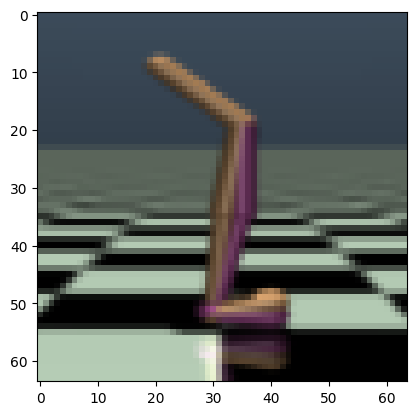

In [138]:
# size = 32
# size = 48
# size = 128
size = 64

# original: [ 256, 256, 3 ]

n = 10
frames = []

resize = Resize((size, size), antialias=True) # type: ignore

for i in d._track(range(n), description='Rendering Frames'):

    rand = random.randint(0, n)
    qp, qv = d.data['QP'][rand], d.data['QV'][rand]
    env.set_state(qp, qv)  # type: ignore

    height, width = 256, 256
    with ml.RedirectStream():
        frame = env.sim.render(height, width, camera_name='track', mode='offscreen')  # type: ignore
    frame = np.flip(frame, axis=0)
    frame = torch.from_numpy(frame.copy())
    frame = frame.to(torch.uint8)
    frame = frame.permute(2, 0, 1)

    frame = crop(frame, top=64, left=64, width=128, height=192)
    frame = resize(frame)

    frames.append(frame)
    
print(frames[0].shape)

plt.imshow(frames[0].permute(1, 2, 0))